<a href="https://colab.research.google.com/github/AbrarAli-SE/Code-a-Ai/blob/main/Short_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abrar Ali**
# ID: **55843**
## Short Project **02**

## Import All Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model # This is for the visual summary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import math

# Set a consistent figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries imported successfully.\n")

Libraries imported successfully.



## Load Dataset and Define Class Names

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print(f"Loaded training data shape: {x_train.shape}")
print(f"Loaded training labels shape: {y_train.shape}")
print(f"Loaded test data shape: {x_test.shape}")
print(f"Loaded test labels shape: {y_test.shape}")
print("Dataset loaded.\n")


Loaded training data shape: (60000, 28, 28)
Loaded training labels shape: (60000,)
Loaded test data shape: (10000, 28, 28)
Loaded test labels shape: (10000,)
Dataset loaded.



## Data Preprocessing & Visualization

Reshaped training data: (60000, 28, 28, 1)
Reshaped test data: (10000, 28, 28, 1)
Visualizing first 25 samples...
Saved 'fashion_mnist_samples.png' to disk.
Data preprocessing and visualization complete.



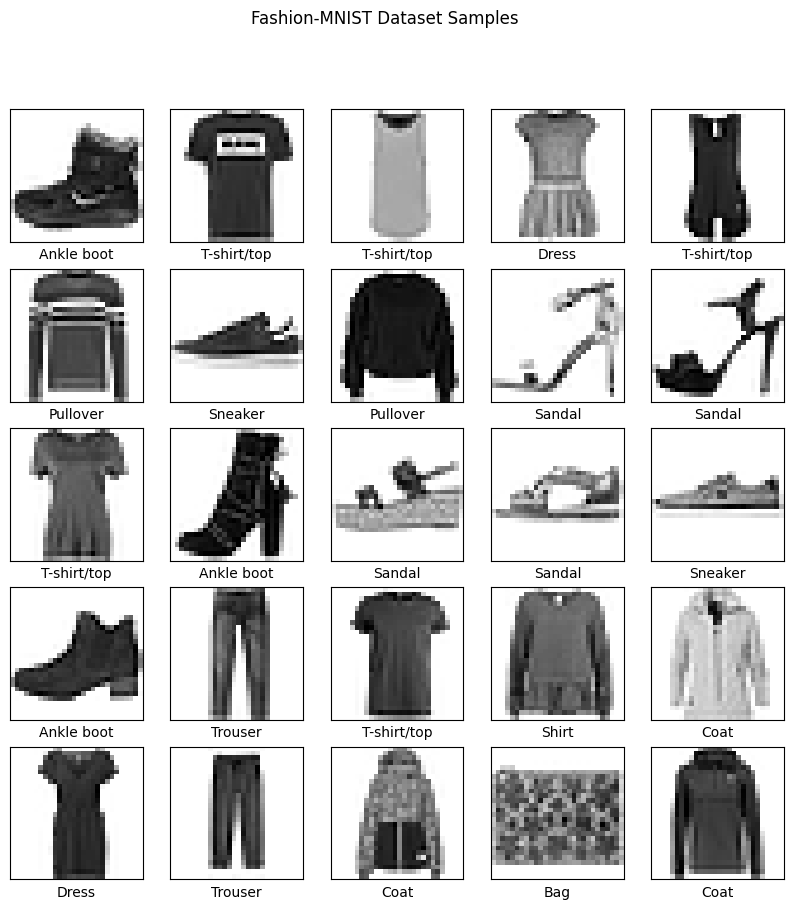

In [ ]:
# --- 1. Normalize pixel values ---
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# --- 2. Reshape data for CNN ---
# We use x_train.shape[0] to get the number of images (60000)
x_train_reshaped = x_train_norm.reshape(x_train.shape[0], 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(x_test.shape[0], 28, 28, 1)

print(f"Reshaped training data: {x_train_reshaped.shape}")
print(f"Reshaped test data: {x_test_reshaped.shape}")

# --- 3. Visualize a few samples (optional but good) ---
print("Visualizing first 25 samples...")
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Use the *original* (non-normalized) x_train for plotting
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Fashion-MNIST Dataset Samples")
plt.savefig('fashion_mnist_samples.png')
print("Saved 'fashion_mnist_samples.png' to disk.")
# plt.show() # Uncomment if running locally
print("Data preprocessing and visualization complete.\n")

## Build and Compile the CNN Model

In [ ]:
# Define model constants
INPUT_SHAPE = (28, 28, 1)
NUM_CLASSES = 10

model = keras.Sequential([
    # Input layer
    keras.Input(shape=INPUT_SHAPE),

    # --- C-M-C-M Block ---
    # Convolutional Layer 1: 32 filters, 3x3 kernel. 'relu' activation.
    #
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    # MaxPooling Layer 1: 2x2 pool, shrinking the image.
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2: 64 filters, 3x3 kernel.
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # MaxPooling Layer 2: 2x2 pool.
    layers.MaxPooling2D(pool_size=(2, 2)),

    # --- Fully Connected Block ---
    # Flatten Layer: Converts 2D feature maps to a 1D vector.
    layers.Flatten(),

    # Dense (Fully Connected) Layer 1: 128 neurons.
    layers.Dense(128, activation='relu'),

    # Dropout Layer: Randomly "turns off" 50% of neurons during
    # training to prevent the model from memorizing the data.
    layers.Dropout(0.5),

    # Output Layer: 10 neurons (one for each class).
    # 'softmax' activation converts outputs to probabilities.
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# --- Compile the model ---
# We configure the model for training.
# - 'adam' optimizer is efficient and works well.
# - 'sparse_categorical_crossentropy' is the correct loss function
#   when labels are simple integers (0, 1, 2...)
# - We track 'accuracy' as our main metric.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Print the Model Summaries ---
print("\n--- Model Text Summary ---")
model.summary()
print("--------------------------\n")

# --- Generate Visual Model Summary ---
# This saves a diagram of the model architecture as a PNG file.
# This is excellent for your final report.
try:
    plot_model(model,
               to_file='model_architecture.png',
               show_shapes=True,
               show_layer_names=True,
               show_layer_activations=True)
    print("Saved 'model_architecture.png' to disk.")
except ImportError:
    print("Could not generate visual model summary. 'pydot' or 'graphviz' may be missing.")

print("Model built and compiled successfully.\n")




--- Model Text Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

--------------------------

Saved 'model_architecture.png' to disk.
Model built and compiled successfully.



## Train the Model

In [ ]:
# Define training constants
NUM_EPOCHS = 10
BATCH_SIZE = 64 # Process 64 images at a time
VALIDATION_SPLIT = 0.2 # 80% train, 20% validation

# Train the model!
# We store the output in 'history' to plot the graphs later.
history = model.fit(
    x_train_reshaped,
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT
)

print("\nModel training finished.\n")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6856 - loss: 0.8908 - val_accuracy: 0.8585 - val_loss: 0.3958
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8441 - loss: 0.4311 - val_accuracy: 0.8775 - val_loss: 0.3327
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8718 - loss: 0.3560 - val_accuracy: 0.8916 - val_loss: 0.2938
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8816 - loss: 0.3243 - val_accuracy: 0.8907 - val_loss: 0.2974
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8920 - loss: 0.2962 - val_accuracy: 0.9006 - val_loss: 0.2720
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8998 - loss: 0.2782 - val_accuracy: 0.9031 - val_loss: 0.2665
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9057 - loss: 0.2609 - val_accuracy: 0.9087 - val_loss: 0.2537
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9086 - loss: 0.2489 - val_accuracy: 0.

## Plot Training & Validation History

Saved 'model_history_plots.png' to disk.
Plots generated.



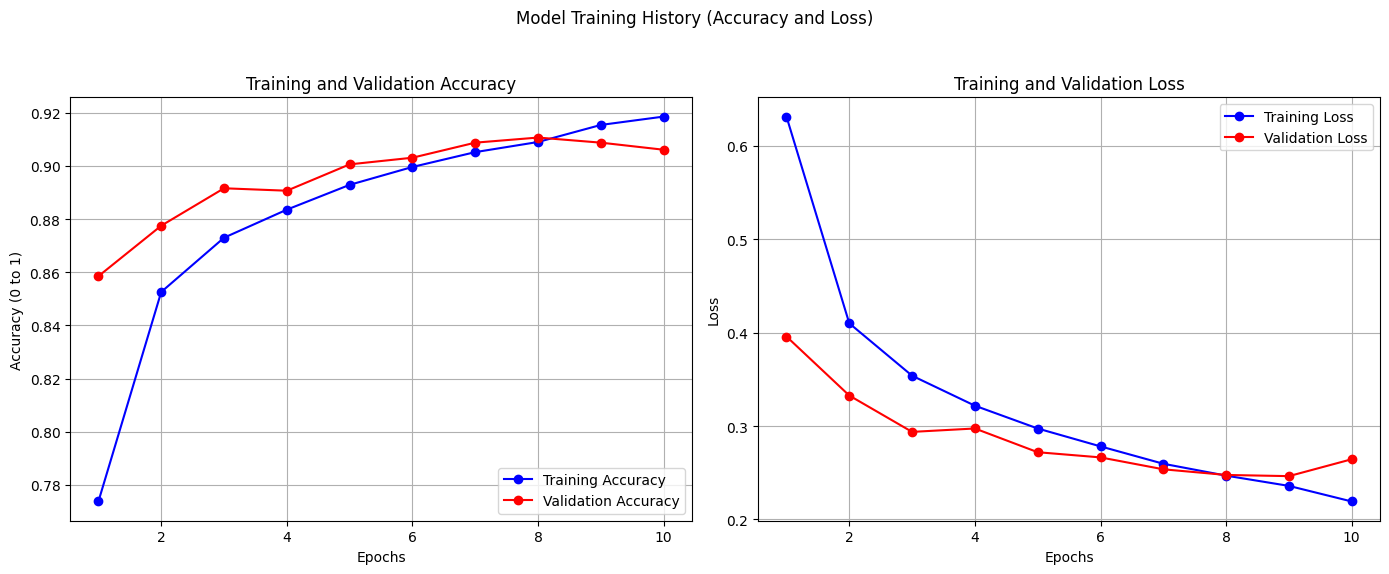

In [ ]:
# Extract metrics from the history object
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_range = range(1, NUM_EPOCHS + 1)

# Create a 1x2 grid of plots
plt.figure(figsize=(14, 6))

# --- Plot 1: Training and Validation Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (0 to 1)')
plt.legend(loc='lower right')
plt.grid(True)

# --- Plot 2: Training and Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.suptitle('Model Training History (Accuracy and Loss)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('model_history_plots.png')
print("Saved 'model_history_plots.png' to disk.")
# plt.show()
print("Plots generated.\n")

## Evaluate Model on Test Set

313/313 - 2s - 7ms/step - accuracy: 0.8995 - loss: 0.2797

Final Test Accuracy: 89.95%
Final Test Loss: 0.2797
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.80      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.92      0.78      0.84      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.79      0.91      0.84      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.69      0.72      0.70      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

-------------------------------------------

Ge

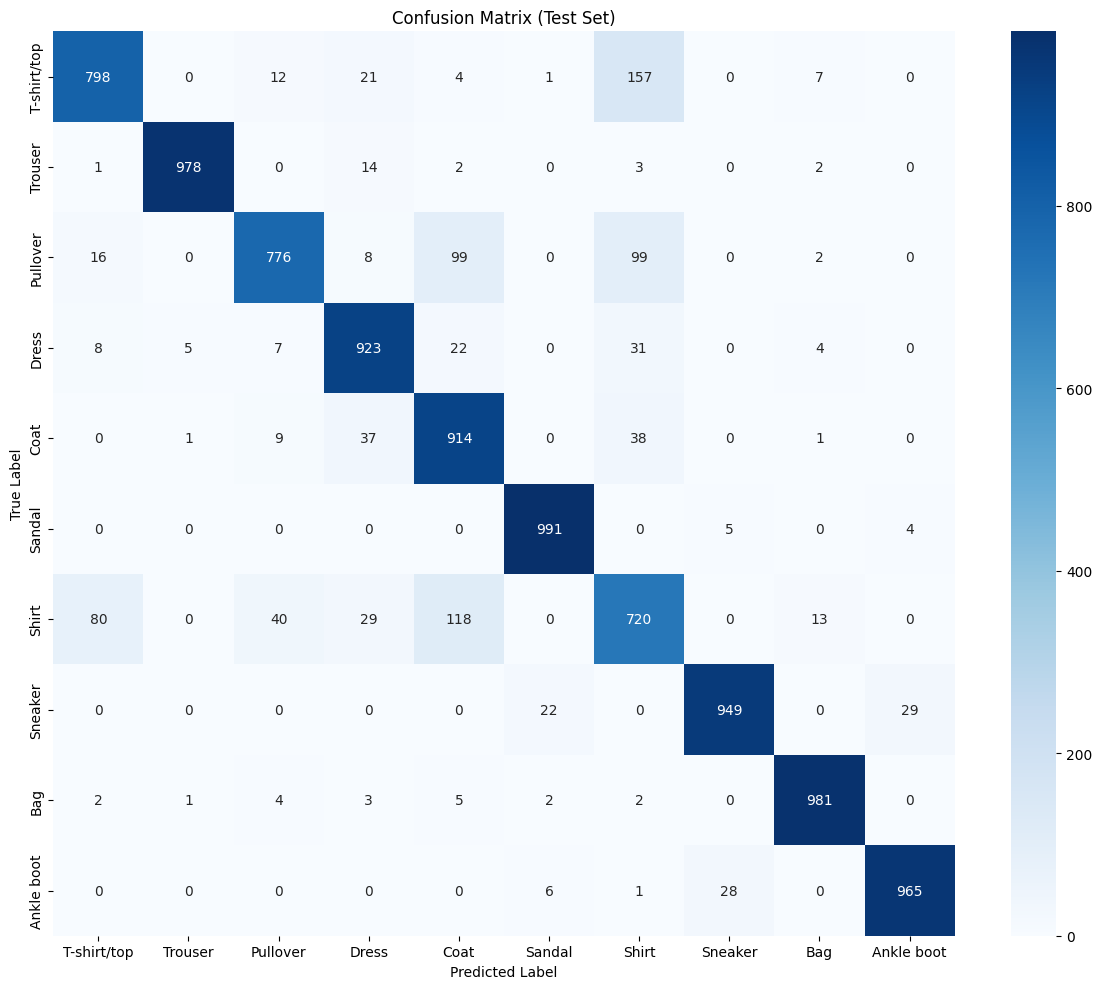

In [ ]:
# --- 1. Get final test accuracy ---
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f'\nFinal Test Accuracy: {test_acc*100:.2f}%')
print(f'Final Test Loss: {test_loss:.4f}')

# --- 2. Get predictions ---
# Get probability predictions for each class
y_pred_probs = model.predict(x_test_reshaped)
# Get the single class with the highest probability
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# --- 3. Print Classification Report ---
print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred_labels, target_names=class_names))
print("-------------------------------------------\n")

# --- 4. Plot Confusion Matrix ---
print("Generating confusion matrix...")
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm,
            annot=True,     # Show the numbers in each cell
            fmt='d',        # Format as integers
            cmap='Blues',   # Color scheme
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("Saved 'confusion_matrix.png' to disk.")
# plt.show()
print("Final evaluation complete.\n")



## Visualize Individual Predictions

Saved 'prediction_visualizations.png' to disk.

--- All Cells Finished ---
Project complete. Check the saved .png files for your report.


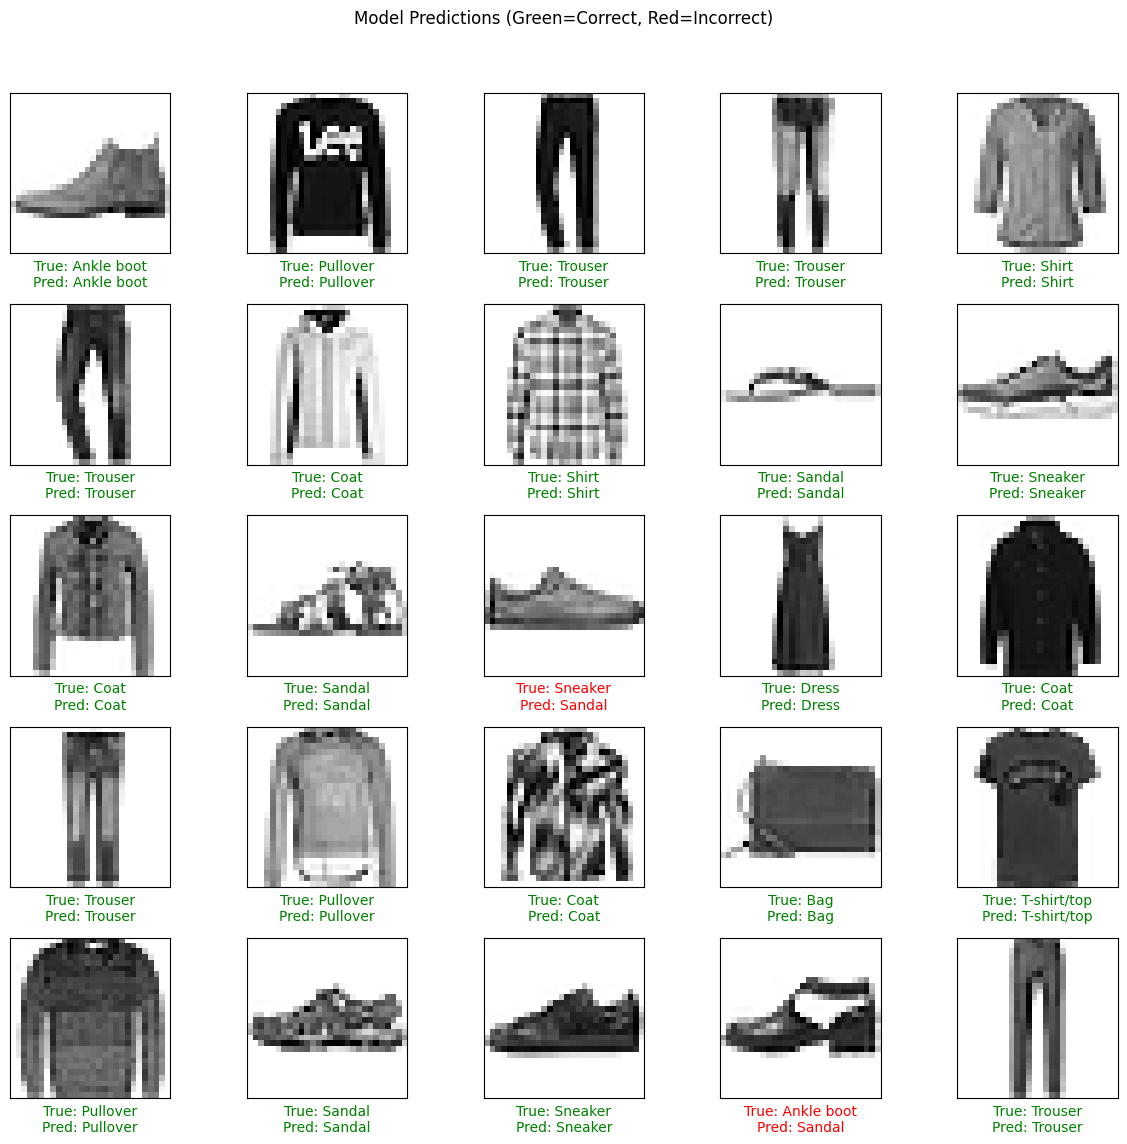

In [ ]:
def plot_prediction_grid(images, true_labels, pred_labels, class_names, num_rows=5, num_cols=5):
    """
    Plots a grid of images, their true labels, and their predicted labels.
    """
    plt.figure(figsize=(12, 12))
    num_images = num_rows * num_cols
    for i in range(num_images):
        if i >= len(images):
            break

        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # We plot the original, non-normalized, non-reshaped image
        plt.imshow(images[i], cmap=plt.cm.binary)

        true_label_name = class_names[true_labels[i]]
        pred_label_name = class_names[pred_labels[i]]

        # Set color based on correctness
        if true_labels[i] == pred_labels[i]:
            color = 'green'
        else:
            color = 'red'

        plt.xlabel(f"True: {true_label_name}\nPred: {pred_label_name}", color=color)

    plt.suptitle("Model Predictions (Green=Correct, Red=Incorrect)")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('prediction_visualizations.png')
    print("Saved 'prediction_visualizations.png' to disk.")
    # plt.show()

# Plot the first 25 test images and their predictions
plot_prediction_grid(x_test, y_test, y_pred_labels, class_names)

print("\n--- All Cells Finished ---")
print("Project complete. Check the saved .png files for your report.")